In [1]:
import pandas as pd 
import numpy as np

In [2]:
#using list
student_data=[
    [100,80,12],[34,35,2],[23,43,4],[80,50,2]
]

In [3]:
pd.DataFrame(student_data,columns=['marks','iq','package'])

,marks,iq,package
0,100,80,12
1,34,35,2
2,23,43,4
3,80,50,2


In [4]:
student_dict={
    'name':['Rishabh','Sujal','Tanishq','tushar','somya','mayank'],
    'iq':[100,90,120,80,0,0],
    'marks':[80,70,100,50,0,0],
    'package':[10,7,14,2,0,0]
}
students=pd.DataFrame(student_dict)
students.set_index('name',inplace=True) # yha humne colns ko  index me badal diya 
#aur humare defaault indices hat gaye


In [5]:
#using read_csv
movies=pd.read_csv('movies.csv')
movies

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)


In [6]:
ipl=pd.read_csv("ipl-matches.csv")
ipl

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


# Dataframe Attribute and method 

In [7]:
#shape--> kitne no. of rows and coln h 
movies.shape
ipl.shape

(950, 20)

In [8]:
#dtype-> seies milta h 
# index me col ka naam aur value me datatype
movies.dtypes

title_x              object
imdb_id              object
poster_path          object
wiki_link            object
title_y              object
original_title       object
is_adult              int64
year_of_release       int64
runtime              object
genres               object
imdb_rating         float64
imdb_votes            int64
story                object
summary              object
tagline              object
actors               object
wins_nominations     object
release_date         object
dtype: object

In [9]:
#index--> Range btata h rows and coln ki
movies.index
ipl.index

RangeIndex(start=0, stop=950, step=1)

In [10]:
#column--> sare coln feth karke deta h 
movies.columns
ipl.columns
students.columns

Index(['iq', 'marks', 'package'], dtype='object')

In [11]:
# values --> 2d numpy array
students.values

array([[100,  80,  10],
       [ 90,  70,   7],
       [120, 100,  14],
       [ 80,  50,   2],
       [  0,   0,   0],
       [  0,   0,   0]])

In [12]:
#head and tail
movies.head(2)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


In [13]:
ipl.tail(5)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri
949,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen


In [14]:
#sample--> random row nikalke deta 
movies.sample(3)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
283,Shortcut Safari,tt4505006,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Shortcut_Safari,Shortcut Safari,Shortcut Safari,0,2016,101,Adventure|Drama|Mystery,6.1,40,Shortcut Safari revolves around a group of urb...,'Shortcut Safari' is about adventures of a gro...,NaN,Jimmy Sheirgill|,NaN,29 April 2016 (India)
1444,Ishq Vishk,tt0362771,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Ishq_Vishk,Ishq Vishk,Ishq Vishk,0,2003,134,Comedy|Romance,6.0,3647,Rajiv Mathur decides to go conditionally stead...,A collegian (Shahid Kapoor) woos a beautiful g...,NaN,Shahid Kapoor|Amrita Rao|Shenaz Treasury|Visha...,6 wins & 3 nominations,10 April 2003 (India)
1046,Aggar (film),tt0875692,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Aggar_(film),Aggar: Passion Betrayal Terror,Aggar: Passion Betrayal Terror,0,2007,\N,Romance|Thriller,4.0,259,A woman discovers that becoming attracted to t...,A woman discovers that becoming attracted to t...,NaN,Tusshar Kapoor|Udita Goswami|Shreyas Talpade|,NaN,NaN


In [15]:
#info--> getting summary
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title_x           1629 non-null   object 
 1   imdb_id           1629 non-null   object 
 2   poster_path       1526 non-null   object 
 3   wiki_link         1629 non-null   object 
 4   title_y           1629 non-null   object 
 5   original_title    1629 non-null   object 
 6   is_adult          1629 non-null   int64  
 7   year_of_release   1629 non-null   int64  
 8   runtime           1629 non-null   object 
 9   genres            1629 non-null   object 
 10  imdb_rating       1629 non-null   float64
 11  imdb_votes        1629 non-null   int64  
 12  story             1609 non-null   object 
 13  summary           1629 non-null   object 
 14  tagline           557 non-null    object 
 15  actors            1624 non-null   object 
 16  wins_nominations  707 non-null    object 


In [16]:
ipl.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [17]:
#describe --> for summary of all mathematical 
movies.describe()

,is_adult,year_of_release,imdb_rating,imdb_votes
count,1629.0,1629.000000,1629.000000,1629.000000
mean,0.0,2010.263966,5.557459,5384.263352
std,0.0,5.381542,1.567609,14552.103231
min,0.0,2001.000000,0.000000,0.000000
25%,0.0,2005.000000,4.400000,233.000000
50%,0.0,2011.000000,5.600000,1000.000000
75%,0.0,2015.000000,6.800000,4287.000000
max,0.0,2019.000000,9.400000,310481.000000


In [18]:
ipl.describe()

,ID,Margin
count,9.500000e+02,932.000000
mean,8.304852e+05,17.056867
std,3.375678e+05,21.633109
min,3.359820e+05,1.000000
25%,5.012612e+05,6.000000
50%,8.297380e+05,8.000000
75%,1.175372e+06,19.000000
max,1.312200e+06,146.000000


In [19]:
#is null  --> har coln me check karta hai ki missiing values hai ki nahi 

movies.isnull().sum() #adding sum will give the nun values ,

title_x                0
imdb_id                0
poster_path          103
wiki_link              0
title_y                0
original_title         0
is_adult               0
year_of_release        0
runtime                0
genres                 0
imdb_rating            0
imdb_votes             0
story                 20
summary                0
tagline             1072
actors                 5
wins_nominations     922
release_date         107
dtype: int64

In [20]:
#Duplicated --> gives the dupplicated data / row
movies.duplicated().sum()

np.int64(0)

In [21]:
students.duplicated().sum()
#do row duplicate nikalta h 

np.int64(1)

In [22]:
#Rename--> Datafram ke coln ka naam rename kar deta hai 
Renamed=students.rename(columns={'marks':'percent',
                        'package':'LPA'
                         },inplace=True)
# but this is not permanent Changes 
#we use inplace=True for the permanent changes 


In [23]:
students

,iq,percent,LPA
name,,,
Rishabh,100,80,10
Sujal,90,70,7
Tanishq,120,100,14
tushar,80,50,2
somya,0,0,0
mayank,0,0,0


# Mathematical  Methods

In [24]:
#sum --> Axis Arguments 
movies.sum(numeric_only=True)
#numeric only bata hai ki ham sirf  numeric values 
# ki sum ki baat kar rhe

is_adult                 0.0
year_of_release    3274720.0
imdb_rating           9053.1
imdb_votes         8770965.0
dtype: float64

In [25]:
students.sum() #applied to coln(default)
students.sum(axis=1) #Raw wise 0.Column 1.Row 

name
Rishabh    190
Sujal      167
Tanishq    234
tushar     132
somya        0
mayank       0
dtype: int64

In [26]:
students.mean(axis=0) #col wise
students.mean(axis=1)#row wise

name
Rishabh    63.333333
Sujal      55.666667
Tanishq    78.000000
tushar     44.000000
somya       0.000000
mayank      0.000000
dtype: float64

In [27]:
students.std()
students.var()
students.describe()
students.count(axis=1) #value count karta h column wise 

name
Rishabh    3
Sujal      3
Tanishq    3
tushar     3
somya      3
mayank     3
dtype: int64

# Selecting column from a Dataframe

In [28]:
#single coln
type(movies['title_x'])
ipl['Venue'].head(5).sum()


'Narendra Modi Stadium, AhmedabadNarendra Modi Stadium, AhmedabadEden Gardens, KolkataEden Gardens, KolkataWankhede Stadium, Mumbai'

In [29]:
#Multiple Columns --> jis order me chizo ko mangaunga 
# usi order me aayengi chize
movies[['title_x','imdb_id']]

,title_x,imdb_id
0,Uri: The Surgical Strike,tt8291224
1,Battalion 609,tt9472208
2,The Accidental Prime Minister (film),tt6986710
3,Why Cheat India,tt8108208
4,Evening Shadows,tt6028796
...,...,...
1624,Tera Mera Saath Rahen,tt0301250
1625,Yeh Zindagi Ka Safar,tt0298607
1626,Sabse Bada Sukh,tt0069204
1627,Daaka,tt10833860


In [30]:
ipl[['Team1','Team2','WinningTeam']]

,Team1,Team2,WinningTeam
0,Rajasthan Royals,Gujarat Titans,Gujarat Titans
1,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals
2,Royal Challengers Bangalore,Lucknow Super Giants,Royal Challengers Bangalore
3,Rajasthan Royals,Gujarat Titans,Gujarat Titans
4,Sunrisers Hyderabad,Punjab Kings,Punjab Kings
...,...,...,...
945,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders
946,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore
947,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils
948,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings


# Selecting rows from a dataframe
1. **iloc--> Searches using index position**
2. **loc--> Searches using label  index**

In [31]:
#iloc
#single row karenge toh series milega
type(movies.iloc[0]) #index positon ke hisaab se humne row fetch kiya 

pandas.core.series.Series

In [32]:
#multiple Row nikalenge toh dataframe milega
movies.iloc[0:11:2]

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
6,Fraud Saiyaan,tt5013008,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Fraud_Saiyaan,Fraud Saiyaan,Fraud Saiyyan,0,2019,109,Comedy|Drama,4.2,504,Fraud Saiyyan is the story of a con artist in ...,Fraud Saiyyan is the story of a con artist in ...,NaN,Arshad Warsi|Saurabh Shukla|Flora Saini|Sara L...,NaN,18 January 2019 (India)
8,Manikarnika: The Queen of Jhansi,tt6903440,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Manikarnika:_The...,Manikarnika: The Queen of Jhansi,Manikarnika: The Queen of Jhansi,0,2019,148,Action|Biography|Drama,6.5,7361,Manikarnika born in Varanasi when Dixt a minis...,Story of Rani Lakshmibai one of the leading f...,NaN,Kangana Ranaut|Rimi Sen|Atul Kulkarni|Nalneesh...,NaN,25 January 2019 (USA)
10,Amavas,tt8396186,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Amavas,Amavas,Amavas,0,2019,134,Horror|Thriller,2.8,235,Far away from the bustle of the city a young ...,The lives of a couple turn into a nightmare a...,NaN,Ali Asgar|Vivan Bhatena|Nargis Fakhri|Sachiin ...,NaN,8 February 2019 (India)


In [33]:
#Fancy indexing
movies.iloc[[1,2,5,7,8]]

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
5,Soni (film),tt6078866,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Soni_(film),Soni,Soni,0,2018,97,Drama,7.2,1595,Soni a young policewoman in Delhi and her su...,While fighting crimes against women in Delhi ...,NaN,Geetika Vidya Ohlyan|Saloni Batra|Vikas Shukla...,3 wins & 5 nominations,18 January 2019 (USA)
7,Bombairiya,tt4971258,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Bombairiya,Bombairiya,Bombairiya,0,2019,104,Comedy|Crime|Drama,4.3,295,It follows the story of Meghna who gets embro...,It follows the story of Meghna who gets embro...,They didn't mean to change the world.,Radhika Apte|Akshay Oberoi|Siddhanth Kapoor|Ra...,NaN,18 January 2019 (India)
8,Manikarnika: The Queen of Jhansi,tt6903440,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Manikarnika:_The...,Manikarnika: The Queen of Jhansi,Manikarnika: The Queen of Jhansi,0,2019,148,Action|Biography|Drama,6.5,7361,Manikarnika born in Varanasi when Dixt a minis...,Story of Rani Lakshmibai one of the leading f...,NaN,Kangana Ranaut|Rimi Sen|Atul Kulkarni|Nalneesh...,NaN,25 January 2019 (USA)


In [34]:
#loc--> location .. ye index ke label ke hisaab se fetch kara h 
students.loc['Sujal':'tushar':1] # yaha pe last wala bhi included hai location based  me 

,iq,percent,LPA
name,,,
Sujal,90,70,7
Tanishq,120,100,14
tushar,80,50,2


In [35]:
students.loc[['Sujal','Tanishq','mayank']]

,iq,percent,LPA
name,,,
Sujal,90,70,7
Tanishq,120,100,14
mayank,0,0,0


# selecting  both rows and column

In [36]:
movies.iloc[0:3,0:3]

,title_x,imdb_id,poster_path
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...
1,Battalion 609,tt9472208,NaN
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...


In [37]:
movies.loc[0:3,'title_x':'poster_path']

,title_x,imdb_id,poster_path
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...
1,Battalion 609,tt9472208,NaN
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...


# Filtering a Dataframe

In [38]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [39]:
#Find all the Winning team 
mask=ipl['MatchNumber']=='Final'
new_df=ipl[mask]
new_df[['Season','WinningTeam']]
a=ipl[ipl['MatchNumber']=='Final'][['Season','WinningTeam']]
a

,Season,WinningTeam
0,2022,Gujarat Titans
74,2021,Chennai Super Kings
134,2020/21,Mumbai Indians
194,2019,Mumbai Indians
254,2018,Chennai Super Kings
314,2017,Mumbai Indians
373,2016,Sunrisers Hyderabad
433,2015,Mumbai Indians
492,2014,Kolkata Knight Riders
552,2013,Mumbai Indians


In [40]:
movies.sample(3)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1148,Banaras (2006 film),tt0449189,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Banaras_(2006_film),Banaras,Banaras,0,2006,122,Drama|Musical,6.2,301,Shwetambri Nath lives a wealthy lifestyle in t...,A mystic love story... between two people of d...,A mystic love story,Urmila Matondkar|Ashmit Patel|Dimple Kapadia|R...,NaN,7 April 2006 (India)
60,Yaaram (2019 film),tt11007050,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yaaram_(2019_film),#Yaaram,#Yaaram,0,2019,\N,Comedy|Romance,5.7,7,All set for an arranged marriage Rohit Bajaj ...,All set for an arranged marriage Rohit Bajaj ...,NaN,Siddhanth Kapoor|Prateik|Anita Raj|Ishita Raj|...,NaN,NaN
509,Yeh Hai Bakrapur,tt3524410,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Hai_Bakrapur,Yeh Hai Bakrapur,Yeh Hai Bakrapur,0,2014,95,Comedy|Drama,3.8,240,Set an against the backdrop of rural India thi...,Set an against the backdrop of rural India thi...,NaN,Anshuman Jha|Suruchi Aulakh|Asif Basra|Yoshika...,NaN,9 May 2014 (India)


In [41]:
# how many super over finishes have occured
ipl.head(2)
ipl[ipl['SuperOver']=='Y'].shape[0]

14

In [42]:
#how many matches csk won in kolkata

# ipl[ipl['WinningTeam']=='Chennai Super Kings']
a=ipl[(ipl['City']=='Kolkata') & (ipl['WinningTeam']=='Chennai Super Kings')].shape[0]
a

5

In [43]:
# toss winner is match winner in percentage
ipl.head(3)
a=ipl[ipl['TossWinner']==ipl['WinningTeam']].shape[0]/ipl.shape[0]*100
a



51.473684210526315

In [44]:
# movies with rating higher than 8 and votes>10000
movies.sample(1) 
movies[(movies['imdb_rating']>8.4) & (movies['imdb_votes']>10000)]

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1058,Black Friday (2007 film),tt0400234,https://upload.wikimedia.org/wikipedia/en/5/58...,https://en.wikipedia.org/wiki/Black_Friday_(20...,Black Friday,Black Friday,0,2004,143,Action|Crime|Drama,8.5,16761,A dramatic presentation of the bomb blasts tha...,Black Friday is a film about the investigation...,The story of the Bombay bomb blasts,Kay Kay Menon|Pavan Malhotra|Aditya Srivastava...,3 nominations,9 February 2007 (India)


In [45]:
# Action movies with rating higher than 7.5
#apply==>pure series ke upar ek custom logic apply kaarte ho
mask1=movies['genres'].str.split('|').apply(lambda x:"Action" in x)
mask2=movies['imdb_rating']>7.5
movies[mask1 & mask2].shape[0]

33

In [46]:
# way 2 using contains
Mask1=movies['genres'].str.contains('Action')
Mask2=movies['imdb_rating']>7.5
movies[Mask1 & Mask2]

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
41,Family of Thakurganj,tt8897986,https://upload.wikimedia.org/wikipedia/en/9/99...,https://en.wikipedia.org/wiki/Family_of_Thakur...,Family of Thakurganj,Family of Thakurganj,0,2019,127,Action|Drama,9.4,895,The film is based on small town of North India...,The film is based on small town of North India...,NaN,Jimmy Sheirgill|Mahie Gill|Nandish Singh|Prana...,NaN,19 July 2019 (India)
84,Mukkabaaz,tt7180544,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Mukkabaaz,The Brawler,Mukkabaaz,0,2017,154,Action|Drama|Sport,8.1,5434,A boxer (Shravan) belonging to upper cast tra...,A boxer struggles to make his mark in the boxi...,NaN,Viineet Kumar|Jimmy Sheirgill|Zoya Hussain|Rav...,3 wins & 6 nominations,12 January 2018 (USA)
106,Raazi,tt7098658,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Raazi,Raazi,Raazi,0,2018,138,Action|Drama|Thriller,7.8,20289,Hidayat Khan is the son of an Indian freedom f...,A Kashmiri woman agrees to marry a Pakistani a...,An incredible true story,Alia Bhatt|Vicky Kaushal|Rajit Kapoor|Shishir ...,21 wins & 26 nominations,11 May 2018 (USA)
110,Parmanu: The Story of Pokhran,tt6826438,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Parmanu:_The_Sto...,Parmanu: The Story of Pokhran,Parmanu: The Story of Pokhran,0,2018,129,Action|Drama|History,7.7,18292,Captain Ashwat Raina's efforts to turn India i...,Ashwat Raina and his teammates arrive in Pokhr...,1998| India: one secret operation| six Indians...,John Abraham|Boman Irani|Diana Penty|Anuja Sat...,NaN,25 May 2018 (USA)
112,Bhavesh Joshi Superhero,tt6129302,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Bhavesh_Joshi_Su...,Bhavesh Joshi Superhero,Bhavesh Joshi Superhero,0,2018,154,Action|Drama,7.6,4928,Bhavesh Joshi Superhero is an action film abou...,The origin story of Bhavesh Joshi an Indian s...,This year| justice will have a new name.,Harshvardhan Kapoor|Priyanshu Painyuli|Ashish ...,2 nominations,1 June 2018 (USA)
169,The Ghazi Attack,tt6299040,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Ghazi_Attack...,The Ghazi Attack,The Ghazi Attack,0,2017,116,Action|Thriller|War,7.6,10332,In 1971 amid rising tensions between India an...,A Pakistani submarine Ghazi plans to secretly...,The war you did not know about,Rana Daggubati|Kay Kay Menon|Atul Kulkarni|Om ...,1 win & 7 nominations,17 February 2017 (USA)
219,Raag Desh (film),tt6080746,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Raagdesh,Raag Desh,Raag Desh,0,2017,135,Action|Drama|History,8.3,341,A period film based on the historic 1945 India...,A period film based on the historic 1945 India...,NaN,Kunal Kapoor|Amit Sadh|Mohit Marwah|Kenneth De...,NaN,28 July 2017 (India)
258,Irudhi Suttru,tt5310090,https://upload.wikimedia.org/wikipedia/en/f/fe...,https://en.wikipedia.org/wiki/Saala_Khadoos,Saala Khadoos,Saala Khadoos,0,2016,109,Action|Drama|Sport,7.6,10507,An under-fire boxing coach Prabhu is transfer...,The story of a former boxer who quits boxing f...,NaN,Madhavan|Ritika Singh|Mumtaz Sorcar|Nassar|Rad...,9 wins & 2 nominations,29 January 2016 (USA)
280,Laal Rang,tt5600714,NaN,https://en.wikipedia.org/wiki/Laal_Rang,Laal Rang,Laal Rang,0,2016,147,Action|Crime|Drama,8.0,3741,The friendship of two men is tested when thing...,The frie

In [47]:
# write a function that can return the track record of 2 teams against each other
# solve it later

# Adding new Columns

In [48]:
movies['country']='India'
movies['country']

0       India
1       India
2       India
3       India
4       India
        ...  
1624    India
1625    India
1626    India
1627    India
1628    India
Name: country, Length: 1629, dtype: object

In [49]:
movies.head(5)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date,country
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA),India
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India),India
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA),India
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA),India
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India),India


In [50]:
movies['country']='Bharat'

In [51]:
movies.loc[[1,2,3],'country']='UK'
movies

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date,country
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA),Bharat
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India),UK
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA),UK
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA),UK
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India),Bharat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India),Bharat
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India),Bharat
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN,Bharat
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA),Bharat


In [52]:
#From existing ones 
movies.dropna(inplace=True)

In [53]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 11 to 1623
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title_x           298 non-null    object 
 1   imdb_id           298 non-null    object 
 2   poster_path       298 non-null    object 
 3   wiki_link         298 non-null    object 
 4   title_y           298 non-null    object 
 5   original_title    298 non-null    object 
 6   is_adult          298 non-null    int64  
 7   year_of_release   298 non-null    int64  
 8   runtime           298 non-null    object 
 9   genres            298 non-null    object 
 10  imdb_rating       298 non-null    float64
 11  imdb_votes        298 non-null    int64  
 12  story             298 non-null    object 
 13  summary           298 non-null    object 
 14  tagline           298 non-null    object 
 15  actors            298 non-null    object 
 16  wins_nominations  298 non-null    object 
 17  

In [54]:
movies['Lead Actor']=movies['actors'].str.split("|").apply(lambda x:x[0])

In [55]:
movies

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date,country,Lead Actor
11,Gully Boy,tt2395469,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Gully_Boy,Gully Boy,Gully Boy,0,2019,153,Drama|Music,8.2,22440,"Gully Boy is a film about a 22-year-old boy ""M...",A coming-of-age story based on the lives of st...,Apna Time Aayega!,Ranveer Singh|Alia Bhatt|Siddhant Chaturvedi|V...,6 wins & 3 nominations,14 February 2019 (USA),Bharat,Ranveer Singh
34,Yeh Hai India,tt5525846,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Hai_India,Yeh Hai India,Yeh Hai India,0,2017,128,Action|Adventure|Drama,5.7,169,Yeh Hai India follows the story of a 25 years...,Yeh Hai India follows the story of a 25 years...,A Film for Every Indian,Gavie Chahal|Mohan Agashe|Mohan Joshi|Lom Harsh|,2 wins & 1 nomination,24 May 2019 (India),Bharat,Gavie Chahal
37,Article 15 (film),tt10324144,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Article_15_(film),Article 15,Article 15,0,2019,130,Crime|Drama,8.3,13417,In the rural heartlands of India an upright p...,In the rural heartlands of India an upright p...,Farq Bahut Kar Liya| Ab Farq Laayenge.,Ayushmann Khurrana|Nassar|Manoj Pahwa|Kumud Mi...,1 win,28 June 2019 (USA),Bharat,Ayushmann Khurrana
87,Aiyaary,tt6774212,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Aiyaary,Aiyaary,Aiyaary,0,2018,157,Action|Thriller,5.2,3538,General Gurinder Singh comes with a proposal t...,After finding out about an illegal arms deal ...,The Ultimate Trickery,Sidharth Malhotra|Manoj Bajpayee|Rakul Preet S...,1 nomination,16 February 2018 (USA),Bharat,Sidharth Malhotra
96,Raid (2018 film),tt7363076,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Raid_(2018_film),Raid,Raid,0,2018,122,Action|Crime|Drama,7.4,13159,Set in the 80s in Uttar Pradesh India Raid i...,A fearless income tax officer raids the mansio...,Heroes don't always come in uniform,Ajay Devgn|Saurabh Shukla|Ileana D'Cruz|Amit S...,2 wins & 3 nominations,16 March 2018 (India),Bharat,Ajay Devgn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,Kasoor,tt0272688,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Kasoor,Kasoor,Kasoor,0,2001,151,Drama|Mystery|Thriller,6.0,801,Shekar Saxena is arrested and charged with the...,Shekhar appoints Simran a lawyer with an impe...,A dangerous passion...,Divya Dutta|Sucheta Paushe|Lisa Ray|Apoorva Ag...,2 nominations,2 February 2001 (India),Bharat,Divya Dutta
1601,Maya (2001 film),tt0299027,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Maya_(2001_film),Maya,Maya,0,2001,105,Drama,7.0,277,For 12 year-old Maya life is very simple in h...,MAYA is a coming of age story set against an '...,A child's innocence shattered by unreal tradit...,Anant Nag|Mita Vasisht|Nitya Shetty|Nikhil Yad...,2 wins & 4 nominations,16 January 2002 (Belgium),Bharat,Anant Nag
1607,Nayak (2001 Hindi film),tt0291376,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Nayak_(2001_Hind...,Nayak: The Real Hero,Nayak: The Real Hero,0,2001,187,Action|Drama|Thriller,7.8,12522,Employed as a camera-man at a popular televisi...,A man accepts a challenge by the chief ministe...,Fight the power,Anil Kapoor|Rani Mukerji|Amrish Puri|Johnny Le...,2 nominations,7 September 2001 (India),Bharat,Anil Kapoor
1621,Tum Bin,tt0290326,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Tum_Bin,Tum Bin...: Love Will Find a Way,Tum Bin...: Love Will Find a Way,0,2001,158,Drama|Romance,7.5,2879,Shekar and Amar meet at a party where Amar ask...,Shekhar accidentally kills his associate Amar ...,Love will find a way,Priyanshu Chatterjee|Himanshu Malik|Sandal

# Important Dataframe Functions

In [56]:
#astype
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [57]:
ipl['ID']=ipl['ID'].astype('int32')

In [58]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int32  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [59]:
ipl['Season']=ipl['Season'].astype('category')

In [60]:
ipl['Team1']=ipl['Team1'].astype('category')

In [61]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               950 non-null    int32   
 1   City             899 non-null    object  
 2   Date             950 non-null    object  
 3   Season           950 non-null    category
 4   MatchNumber      950 non-null    object  
 5   Team1            950 non-null    category
 6   Team2            950 non-null    object  
 7   Venue            950 non-null    object  
 8   TossWinner       950 non-null    object  
 9   TossDecision     950 non-null    object  
 10  SuperOver        946 non-null    object  
 11  WinningTeam      946 non-null    object  
 12  WonBy            950 non-null    object  
 13  Margin           932 non-null    float64 
 14  method           19 non-null     object  
 15  Player_of_Match  946 non-null    object  
 16  Team1Players     950 non-null    object  
 1

# DataFrame Methods

In [62]:
# value_counts
# sort_values
# rank
# sort index
# set index
# rename index
# rename
# reset index
# unique & nunique
# isnull/notnull/hasnans
# dropna
# fillna
# drop_duplicates
# drop
# apply
# isin
# nlargest -> nsmallest
# insert
# copy


In [63]:
import numpy as np
import pandas as pd

In [64]:
#value_count (Series & Dataframe )
marks=pd.DataFrame([
    [100,80,10],
    [90,70,7],
    [120,100,14],
    [80,70,14],
    [80,70,14]
],columns=['iq','marks',"package"])

marks.value_counts()



iq   marks  package
80   70     14         2
90   70     7          1
100  80     10         1
120  100    14         1
Name: count, dtype: int64

In [65]:
#Series
marks=pd.Series([1,1,2,2,3,3,4,4,5,5])
marks.value_counts()

1    2
2    2
3    2
4    2
5    2
Name: count, dtype: int64

In [66]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [67]:
# find which player has won most potm -> in in finals and qualifiers
ipl['Player_of_Match']
ipl[~ipl['MatchNumber'].str.isdigit()]['Player_of_Match'].value_counts()

Player_of_Match
KA Pollard           3
F du Plessis         3
SK Raina             3
A Kumble             2
MK Pandey            2
YK Pathan            2
M Vijay              2
JJ Bumrah            2
AB de Villiers       2
SR Watson            2
HH Pandya            1
Harbhajan Singh      1
A Nehra              1
V Sehwag             1
UT Yadav             1
MS Bisla             1
BJ Hodge             1
MEK Hussey           1
MS Dhoni             1
CH Gayle             1
MM Patel             1
DE Bollinger         1
AC Gilchrist         1
RG Sharma            1
DA Warner            1
MC Henriques         1
JC Buttler           1
RM Patidar           1
DA Miller            1
VR Iyer              1
SP Narine            1
RD Gaikwad           1
TA Boult             1
MP Stoinis           1
KS Williamson        1
RR Pant              1
SA Yadav             1
Rashid Khan          1
AD Russell           1
KH Pandya            1
KV Sharma            1
NM Coulter-Nile      1
Washington Sundar 

<Axes: ylabel='count'>

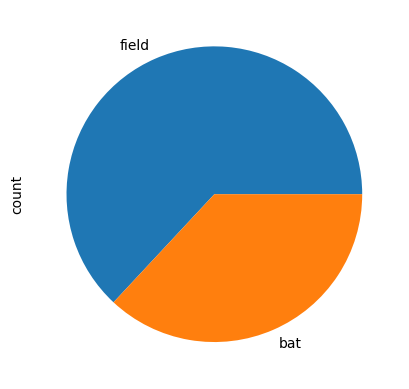

In [68]:
# Toss decision plot I
ipl.head(3)
ipl['TossDecision'].value_counts().plot(kind='pie')

In [69]:
# how many matches each team had play
ipl.head(1)
a=ipl['Team1'].value_counts()
b=ipl['Team2'].value_counts()
(a+b).sort_values(ascending=False)

Mumbai Indians                 231
Royal Challengers Bangalore    226
Kolkata Knight Riders          223
Chennai Super Kings            208
Rajasthan Royals               192
Kings XI Punjab                190
Delhi Daredevils               161
Sunrisers Hyderabad            152
Deccan Chargers                 75
Delhi Capitals                  63
Pune Warriors                   46
Gujarat Lions                   30
Punjab Kings                    28
Gujarat Titans                  16
Rising Pune Supergiant          16
Lucknow Super Giants            15
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64

In [70]:
# 1.	Cities with Most Matches
# → Find the top 5 cities where the most IPL matches have been played.
ipl.head()
ipl['City'].value_counts(ascending=False)

City
Mumbai            159
Kolkata            79
Delhi              78
Chennai            67
Bangalore          65
Hyderabad          64
Chandigarh         56
Pune               51
Jaipur             47
Abu Dhabi          37
Ahmedabad          19
Bengaluru          15
Durban             15
Visakhapatnam      13
Dubai              13
Centurion          12
Rajkot             10
Sharjah            10
Dharamsala          9
Navi Mumbai         9
Indore              9
Johannesburg        8
Ranchi              7
Cuttack             7
Port Elizabeth      7
Cape Town           7
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: count, dtype: int64

In [71]:
# Most Successful Teams
# → Count how many matches each team has won using the WinningTeam column.
ipl.head(1)
ipl['WinningTeam'].value_counts()

WinningTeam
Mumbai Indians                 131
Chennai Super Kings            121
Kolkata Knight Riders          114
Royal Challengers Bangalore    109
Rajasthan Royals                96
Kings XI Punjab                 88
Sunrisers Hyderabad             75
Delhi Daredevils                67
Delhi Capitals                  36
Deccan Chargers                 29
Gujarat Lions                   13
Punjab Kings                    13
Pune Warriors                   12
Gujarat Titans                  12
Rising Pune Supergiant          10
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

In [72]:
# Most Frequent Toss Winners
# → Which teams won the toss most often?
ipl.head()
ipl['TossWinner'].value_counts()

TossWinner
Mumbai Indians                 123
Kolkata Knight Riders          114
Chennai Super Kings            109
Royal Challengers Bangalore    105
Rajasthan Royals                99
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             74
Deccan Chargers                 43
Delhi Capitals                  36
Pune Warriors                   20
Gujarat Lions                   15
Gujarat Titans                  10
Punjab Kings                     9
Kochi Tuskers Kerala             8
Lucknow Super Giants             7
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64

In [73]:
# 	Toss Decision Popularity
# → How many times teams chose to bat vs field after winning the toss?
ipl['TossDecision'].value_counts()

TossDecision
field    599
bat      351
Name: count, dtype: int64

In [74]:
# Top Venues
# → Which 10 stadiums hosted the most matches?
ipl['Venue'].value_counts()

Venue
Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Feroz Shah Kotla                                        60
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Sawai Mansingh Stadium                                  47
Dubai International Cricket Stadium                     46
Punjab Cricket Association Stadium, Mohali              35
Wankhede Stadium, Mumbai                                31
Sheikh Zayed Stadium                                    29
Sharjah Cricket Stadium                                 28
Maharashtra Cricket Association Stadium                 22
Dr DY Patil Sports Academy, Mumbai                      20
Dr DY Patil Sports Academy                              17
Brabourne Stadium, Mumbai                               17
Subrata Roy Sahara Stadium                        

In [75]:
# Player of the Match Awards
# → Which players have won the most Player of the Match awards?
ipl['Player_of_Match'].value_counts()

Player_of_Match
AB de Villiers    25
CH Gayle          22
DA Warner         18
RG Sharma         18
MS Dhoni          17
                  ..
CR Brathwaite      1
Mohsin Khan        1
A Zampa            1
BCJ Cutting        1
MF Maharoof        1
Name: count, Length: 262, dtype: int64

In [76]:
# 7.	Winning Methods
# → Use the WonBy column to check how many matches were won by Runs vs Wickets.
ipl.head(3)
ipl['WonBy'].value_counts()

WonBy
Wickets      509
Runs         423
SuperOver     14
NoResults      4
Name: count, dtype: int64

In [77]:
# 1.	Toss vs Match Winner
# 	•	Among all toss winners, which team converted their toss win into an actual match win the most times?
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [78]:
winner=ipl[ipl['TossWinner'] == ipl['WinningTeam']]
winner['WinningTeam'].value_counts()


WinningTeam
Mumbai Indians                 70
Chennai Super Kings            68
Kolkata Knight Riders          64
Royal Challengers Bangalore    53
Rajasthan Royals               49
Kings XI Punjab                36
Delhi Daredevils               35
Sunrisers Hyderabad            34
Delhi Capitals                 21
Deccan Chargers                19
Gujarat Lions                  10
Gujarat Titans                  7
Rising Pune Supergiant          5
Punjab Kings                    4
Lucknow Super Giants            4
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Pune Warriors                   3
Name: count, dtype: int64

In [79]:
# City Dominance
# In each city, which team has won the most matches? (hint: group by City + WinningTeam then use value_counts()).
ipl.groupby(['City','WinningTeam']).size().reset_index(name='Win')

,City,WinningTeam,Win
0,Abu Dhabi,Chennai Super Kings,4
1,Abu Dhabi,Delhi Capitals,3
2,Abu Dhabi,Kings XI Punjab,2
3,Abu Dhabi,Kolkata Knight Riders,8
4,Abu Dhabi,Mumbai Indians,8
...,...,...,...
236,Visakhapatnam,Kings XI Punjab,1
237,Visakhapatnam,Mumbai Indians,2
238,Visakhapatnam,Rajasthan Royals,1
239,Visakhapatnam,Rising Pune Supergiants,2


In [80]:
# Player of the Match per Team
# For each team, which player won the most Player of the Match awards when that team was the winner?

In [81]:
awards=ipl.groupby(['WinningTeam','Player_of_Match']).size().reset_index(name='awards')
a=awards.loc[awards.groupby('WinningTeam')['awards'].idxmax()]
a

,WinningTeam,Player_of_Match,awards
25,Chennai Super Kings,MS Dhoni,15
42,Deccan Chargers,AC Gilchrist,4
71,Delhi Capitals,S Dhawan,5
110,Delhi Daredevils,V Sehwag,10
113,Gujarat Lions,AJ Finch,3
120,Gujarat Titans,DA Miller,2
163,Kings XI Punjab,SE Marsh,9
171,Kochi Tuskers Kerala,BB McCullum,2
176,Kolkata Knight Riders,AD Russell,12
219,Lucknow Super Giants,Avesh Khan,2


In [82]:
#sort_values()--> applicable on both series and dataframe
x=pd.Series([12,13,14,23,4,2,442,2,4,32])
x.sort_values(ascending=False)

6    442
9     32
3     23
2     14
1     13
0     12
4      4
8      4
5      2
7      2
dtype: int64

In [83]:
movies=pd.read_csv('movies.csv')
movies

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)


In [84]:
movies.sort_values(['title_x'],ascending=False).head(10)


,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India)
939,Zor Lagaa Ke...Haiya!,tt1479857,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zor_Lagaa_Ke...H...,Zor Lagaa Ke... Haiya!,Zor Lagaa Ke... Haiya!,0,2009,\N,Comedy|Drama|Family,6.4,46,A tree narrates the story of four Mumbai-based...,Children build a tree-house to spy on a beggar...,NaN,Meghan Jadhav|Mithun Chakraborty|Riya Sen|Seem...,NaN,NaN
756,Zokkomon,tt1605790,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zokkomon,Zokkomon,Zokkomon,0,2011,109,Action|Adventure,4.0,274,After the passing of his parents in an acciden...,An orphan is abused and abandoned believed to...,Betrayal. Friendship. Bravery.,Darsheel Safary|Anupam Kher|Manjari Fadnnis|Ti...,NaN,22 April 2011 (India)
670,Zindagi Tere Naam,tt2164702,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Tere_Naam,Zindagi Tere Naam,Zindagi Tere Naam,0,2012,120,Romance,4.7,27,Mr. Singh an elderly gentleman relates to hi...,Mr. Singh an elderly gentleman relates to hi...,NaN,Mithun Chakraborty|Ranjeeta Kaur|Priyanka Meht...,1 win,16 March 2012 (India)
778,Zindagi Na Milegi Dobara,tt1562872,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Na_Mileg...,Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,0,2011,155,Comedy|Drama,8.1,60826,Three friends decide to turn their fantasy vac...,Three friends decide to turn their fantasy vac...,NaN,Hrithik Roshan|Farhan Akhtar|Abhay Deol|Katrin...,30 wins & 22 nominations,15 July 2011 (India)
1564,Zindagi Khoobsoorat Hai,tt0340464,NaN,https://en.wikipedia.org/wiki/Zindagi_Khoobsoo...,Zindagi Khoobsoorat Hai,Zindagi Khoobsoorat Hai,0,2002,\N,Drama|Family,5.8,46,Murad Hussein and Gul Baloch have been enemies...,Murad Hussein and Gul Baloch have been enemies...,NaN,Gurdas Maan|Tabu|Ashish Vidyarthi|Rajit Kapoor...,1 win,NaN
602,Zindagi 50-50,tt2929840,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_50-50,Zindagi 50 50,Zindagi 50 50,0,2013,130,Comedy|Drama,2.7,208,Zindagi 50-50 revolves around three different ...,Zindagi 50-50 revolves around three different ...,Rules of life are made to be broken.,Veena Malik|Riya Sen|Rajan Verma|Arya Babbar|S...,NaN,24 May 2013 (India)
1214,Zindaggi Rocks,tt0823261,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindaggi_Rocks,Zindaggi Rocks,Zindaggi Rocks,0,2006,\N,Drama|Romance,4.0,227,During an outing Dr. Suraj Rihan who is marri...,During an outing Dr. Suraj Rihan who is marri...,NaN,Sushmita Sen|Shiney Ahuja|Julian Burkhardt|Rav...,NaN,NaN
1224,Zinda (film),tt0488906,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zinda_(film),Zinda,Zinda,0,2006,116,Action|Drama|Mystery,5.0,3017,Unkempt and unruly-looking Balajit Roy (Sanja...,A man taken and locked up for 14 years withou...,One good act of vengeance.... deserves another,Sanjay Dutt|John Abraham|Lara Dutta|Celina Jai...,2 nominations,12 January 2006 (India)
580,Zila Ghaziabad,tt2171454,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zilla_Ghaziabad,Zila Ghaziabad,Zila Ghaziabad,0,2013,142,Action|Crime|Thriller,3.5,1187,In the city of Ghaziabad gang war breaks betw...,In the city of Ghaziabad gang war breaks betw...,NaN,Vivek Oberoi|Sanjay Dutt|Arshad Warsi|Paresh R...,NaN,22 February 2013 (India)


In [85]:
students = pd.DataFrame({
    'name' : ['nitish', 'ankit', 'rupesh', np.nan, 'mrityunjay', np.nan, 'rishabh', np.nan, 'aditya', np.nan],
    'college': ['bit', 'iit', 'vit', np.nan, np.nan, 'visi', 'ssit', np.nan, np.nan, 'git'],
    'branch' : ['eee', 'it', 'cse', np.nan, 'me', 'ce', 'civ', 'cse', 'bio', np.nan],
    'cgpa': [6.66, 8.25, 6.41, np.nan, 5.6, 9.0, 7.4, 10, 7.4, np.nan],
    'package' : [4, 5, 6, np.nan, 6, 7, 8, 9, np.nan, np.nan]
})

print(students)

         name college branch   cgpa  package
0      nitish     bit    eee   6.66      4.0
1       ankit     iit     it   8.25      5.0
2      rupesh     vit    cse   6.41      6.0
3         NaN     NaN    NaN    NaN      NaN
4  mrityunjay     NaN     me   5.60      6.0
5         NaN    visi     ce   9.00      7.0
6     rishabh    ssit    civ   7.40      8.0
7         NaN     NaN    cse  10.00      9.0
8      aditya     NaN    bio   7.40      NaN
9         NaN     git    NaN    NaN      NaN


In [86]:
students.sort_values('name',na_position='first',ascending=False,inplace=True)

In [87]:
students

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,visi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


In [88]:
movies.head(1)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)


In [89]:
movies.sort_values(['year_of_release','title_x'],ascending=[True,False]).head(12)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1622,Yeh Teraa Ghar Yeh Meraa Ghar,tt0298606,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Teraa_Ghar_Y...,Yeh Teraa Ghar Yeh Meraa Ghar,Yeh Teraa Ghar Yeh Meraa Ghar,0,2001,175,Comedy|Drama,5.7,704,In debt; Dayashankar Pandey is forced to go to...,In debt; Dayashankar Pandey is forced to go to...,NaN,Sunil Shetty|Mahima Chaudhry|Paresh Rawal|Saur...,1 nomination,12 October 2001 (India)
1620,Yeh Raaste Hain Pyaar Ke,tt0292740,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Raaste_Hain_...,Yeh Raaste Hain Pyaar Ke,Yeh Raaste Hain Pyaar Ke,0,2001,149,Drama|Romance,4.0,607,Two con artistes and car thieves Vicky (Ajay ...,Two con artistes and car thieves Vicky (Ajay ...,Love is a journey... not a destination,Ajay Devgn|Madhuri Dixit|Preity Zinta|Vikram G...,NaN,10 August 2001 (India)
1573,Yaadein (2001 film),tt0248617,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yaadein_(2001_film),Yaadein...,Yaadein...,0,2001,171,Drama|Musical|Romance,4.4,3034,Raj Singh Puri is best friends with L.K. Malho...,Raj Singh Puri is best friends with L.K. Malho...,memories to cherish...,Jackie Shroff|Hrithik Roshan|Kareena Kapoor|Am...,1 nomination,27 June 2001 (India)
1621,Tum Bin,tt0290326,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Tum_Bin,Tum Bin...: Love Will Find a Way,Tum Bin...: Love Will Find a Way,0,2001,158,Drama|Romance,7.5,2879,Shekar and Amar meet at a party where Amar ask...,Shekhar accidentally kills his associate Amar ...,Love will find a way,Priyanshu Chatterjee|Himanshu Malik|Sandali Si...,6 nominations,13 July 2001 (India)
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
1615,Style (2001 film),tt0306855,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Style_(2001_film),Style,Style,0,2001,157,Comedy|Musical|Mystery,6.7,1607,Bantu and Chantu are two close friends and fel...,In an attempt to woo the rich women two prank...,NaN,Sharman Joshi|Sahil Khan|Riya Sen|Shilpi Sharm...,NaN,28 December 2001 (India)
1616,Rehnaa Hai Terre Dil Mein,tt0299108,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Rehnaa_Hai_Terre...,Rehnaa Hai Terre Dil Mein,Rehnaa Hai Terre Dil Mein,0,2001,160,Musical|Romance,7.5,6232,Madhav (Maddy) has love at first site with Ree...,A young girl is torn between an obsessive love...,NaN,Madhavan|Saif Ali Khan|Dia Mirza|Vrajesh Hirje...,2 wins & 4 nominations,19 October 2001 (India)
1618,Rahul (film),tt0277981,https://upload.wikimedia.org/wikipedia/en/f/f8...,https://en.wikipedia.org/wiki/Rahul_(film),Rahul,Rahul,0,2001,151,Drama,5.5,219,Mira (N

# Rank

In [90]:
#it is a utility function help in some scenarios  (Series pe applicable h )
batsman=pd.read_csv('batsman_runs_ipl.csv')
batsman

,batter,batsman_run
0,A Ashish Reddy,280
1,A Badoni,161
2,A Chandila,4
3,A Chopra,53
4,A Choudhary,25
...,...,...
600,Yash Dayal,0
601,Yashpal Singh,47
602,Younis Khan,3
603,Yuvraj Singh,2754


In [91]:
# batsman['batting_rank']=batsman['batsman_run'].rank(ascending=False)
# batsman.sort_values('batting_rank')

In [92]:
# 🔹 rank() क्या करता है?

# ये हर value को rank (position) assign करता है, based on order.
# मतलब sorting करने की बजाय rank number देता है।

In [93]:
# sort_value=> ये किसी column की values के आधार पर पूरे DataFrame को sort करता है।
batsman['batsman_rank']=batsman['batsman_run'].rank(ascending=False)
batsman.sort_values('batsman_rank')


,batter,batsman_run,batsman_rank
569,V Kohli,6634,1.0
462,S Dhawan,6244,2.0
130,DA Warner,5883,3.0
430,RG Sharma,5881,4.0
493,SK Raina,5536,5.0
...,...,...,...
512,SS Cottrell,0,594.0
466,S Kaushik,0,594.0
203,IC Pandey,0,594.0
467,S Ladda,0,594.0


In [94]:
#Sort_index (Series And DataFrame )


marks = {
    'maths': 67,
    'english': 57,
    'science': 89,
    'hindi': 100
}

marks_series = pd.Series(marks)
print(marks_series)

maths       67
english     57
science     89
hindi      100
dtype: int64


In [95]:
marks_series.sort_index(ascending=False)

science     89
maths       67
hindi      100
english     57
dtype: int64

In [96]:
movies.sort_index(ascending=False)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1628,Humsafar,tt2403201,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Humsafar,Humsafar,Humsafar,0,2011,35,Drama|Romance,9.0,2968,Sara and Ashar are childhood friends who share...,Ashar and Khirad are forced to get married due...,NaN,Fawad Khan|,NaN,TV Series (2011–2012)
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


In [97]:
#set_index==>> change index (Dataframe)
batsman.set_index('batter',inplace=True)

In [98]:
batsman

,batsman_run,batsman_rank
batter,,
A Ashish Reddy,280,166.5
A Badoni,161,226.0
A Chandila,4,535.0
A Chopra,53,329.0
A Choudhary,25,402.5
...,...,...
Yash Dayal,0,594.0
Yashpal Singh,47,343.0
Younis Khan,3,547.5


In [99]:
#batsman reset index ( Series , Dataframe)
batsman.reset_index()

,batter,batsman_run,batsman_rank
0,A Ashish Reddy,280,166.5
1,A Badoni,161,226.0
2,A Chandila,4,535.0
3,A Chopra,53,329.0
4,A Choudhary,25,402.5
...,...,...,...
600,Yash Dayal,0,594.0
601,Yashpal Singh,47,343.0
602,Younis Khan,3,547.5
603,Yuvraj Singh,2754,27.0


In [100]:
batsman

,batsman_run,batsman_rank
batter,,
A Ashish Reddy,280,166.5
A Badoni,161,226.0
A Chandila,4,535.0
A Chopra,53,329.0
A Choudhary,25,402.5
...,...,...
Yash Dayal,0,594.0
Yashpal Singh,47,343.0
Younis Khan,3,547.5


In [101]:
# how to replace existing index without loosing
batsman.reset_index().set_index('batsman_rank')

,batter,batsman_run
batsman_rank,,
166.5,A Ashish Reddy,280
226.0,A Badoni,161
535.0,A Chandila,4
329.0,A Chopra,53
402.5,A Choudhary,25
...,...,...
594.0,Yash Dayal,0
343.0,Yashpal Singh,47
547.5,Younis Khan,3


In [102]:
# series to dataframe using reset_index
marks_series.reset_index()

,index,0
0,maths,67
1,english,57
2,science,89
3,hindi,100


In [103]:
movies.set_index('title_x',inplace=True)

In [104]:
movies.rename(columns={'imdb_id':'imdb','poster_path':'link'},inplace=True)
movies

,imdb,link,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN


In [105]:
movies.head(1)

,imdb,link,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)


In [106]:
movies.rename(index={'Battalion 609':'Batallion'})

,imdb,link,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
Batallion,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN


# unique --> Applicable only on Series

In [107]:
temp=pd.Series([1,1,2,2,3,3,4,4,5,5,np.nan,np.nan])
temp.unique()

array([ 1.,  2.,  3.,  4.,  5., nan])

In [108]:
ipl['Season'].unique()

['2022', '2021', '2020/21', '2019', '2018', ..., '2012', '2011', '2009/10', '2009', '2007/08']
Length: 15
Categories (15, object): ['2007/08', '2009', '2009/10', '2011', ..., '2019', '2020/21', '2021', '2022']

# kitne no of unique values hai ?


In [109]:
ipl['Season'].nunique() 
#doesnot count nan (Series or dataframe)

15

In [110]:
#isnull(series+Dataframe)
students['name'] [students['name'].isnull()]

3    NaN
5    NaN
7    NaN
9    NaN
Name: name, dtype: object

In [111]:
#notnull
students['name'][students['name'].notnull()]

2        rupesh
6       rishabh
0        nitish
4    mrityunjay
1         ankit
8        aditya
Name: name, dtype: object

In [112]:
#hasnans (colnms me koi bhi missing value hai ki nahi )
students['name'].hasnans

True

In [113]:
students.isnull()

,name,college,branch,cgpa,package
3,True,True,True,True,True
5,True,False,False,False,False
7,True,True,False,False,False
9,True,False,True,True,True
2,False,False,False,False,False
6,False,False,False,False,False
0,False,False,False,False,False
4,False,True,False,False,False
1,False,False,False,False,False
8,False,True,False,False,True


In [114]:
#iska ulta hi jata h
students.notnull()

,name,college,branch,cgpa,package
3,False,False,False,False,False
5,False,True,True,True,True
7,False,False,True,True,True
9,False,True,False,False,False
2,True,True,True,True,True
6,True,True,True,True,True
0,True,True,True,True,True
4,True,False,True,True,True
1,True,True,True,True,True
8,True,False,True,True,False


# Dropna

In [115]:
students['name'].dropna()

2        rupesh
6       rishabh
0        nitish
4    mrityunjay
1         ankit
8        aditya
Name: name, dtype: object

# kisi bhi row me ek bhi missing value h toh pure row ko hi hata dega 

In [116]:
students.dropna(how='any') #default behaviour

,name,college,branch,cgpa,package
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0


In [117]:
students.dropna(how='all') 
#yha all karne se ab jisme puri row hi nan h sirf usi ko hatayega 

,name,college,branch,cgpa,package
5,NaN,visi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


In [118]:
students.dropna(subset=['name'])

,name,college,branch,cgpa,package
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


In [119]:
students.dropna(subset=['name','college'])

,name,college,branch,cgpa,package
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0


# fiilna

In [120]:
students['name'].fillna('unknown')

3       unknown
5       unknown
7       unknown
9       unknown
2        rupesh
6       rishabh
0        nitish
4    mrityunjay
1         ankit
8        aditya
Name: name, dtype: object

In [121]:
students.fillna('0')

,name,college,branch,cgpa,package
3,0,0,0,0,0
5,0,visi,ce,9.0,7.0
7,0,0,cse,10.0,9.0
9,0,git,0,0,0
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.4,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,0,me,5.6,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,0,bio,7.4,0


In [122]:
students['package'].fillna(students['package'].median())

3    6.0
5    7.0
7    9.0
9    6.0
2    6.0
6    8.0
0    4.0
4    6.0
1    5.0
8    6.0
Name: package, dtype: float64

In [123]:
students['name'].fillna(method='ffill')
#forwardfill

/var/folders/x6/3z1b_1m13nn8gl_5jykvtxy40000gn/T/ipykernel_10079/3097609010.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students['name'].fillna(method='ffill')


3           NaN
5           NaN
7           NaN
9           NaN
2        rupesh
6       rishabh
0        nitish
4    mrityunjay
1         ankit
8        aditya
Name: name, dtype: object

# drop_duplicates

In [124]:
marks.duplicated()

AttributeError: 'dict' object has no attribute 'duplicated'

In [ ]:
temp = pd.Series([1,1,1,2,3,3,4,4])
temp.drop_duplicates()

0    1
3    2
4    3
6    4
dtype: int64

In [ ]:
marks.drop_duplicates(keep='last')

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
4,80,70,14


In [ ]:
#find the last match played by virat kohli in Delhi

In [ ]:
ipl.head(3)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough


In [ ]:
ipl['all_player']=ipl['Team1Players']+ipl['Team2Players']
ipl.head(2)

0      ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...
1      ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...
2      ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...
3      ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...
4      ['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...
                             ...                        
945    ['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...
946    ['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...
947    ['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...
948    ['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...
949    ['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...
Name: all_player, Length: 950, dtype: object

In [ ]:
def did_kohli_play(players_list):
    return 'V Kohli' in players_list


In [ ]:
ipl['did_kohli_played']=ipl['all_player'].apply(did_kohli_play)

In [ ]:
ipl[(ipl['did_kohli_played']==True) & (ipl['City']=='Delhi')].drop_duplicates(subset=['City','did_kohli_played'],keep='first')

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all player,all_player,did_kohli_played
208,1178421,Delhi,2019-04-28,2019,46,Delhi Capitals,Royal Challengers Bangalore,Arun Jaitley Stadium,Delhi Capitals,bat,...,16.0,NaN,S Dhawan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['PA Patel', 'V Kohli', 'AB de Villiers', 'S D...",BNJ Oxenford,KN Ananthapadmanabhan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",True


In [ ]:
#drop (series+dataframe)
temp=pd.Series([10,2,3,16,45,78,10])
temp.drop(index=[0,6])
# yha mene index ke hisaab se dlt kar diya 


1     2
2     3
3    16
4    45
5    78
dtype: int64

In [ ]:
students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,visi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [ ]:
students.drop(columns=['branch','cgpa'])

,name,college,package
0,nitish,bit,4.0
1,ankit,iit,5.0
2,rupesh,vit,6.0
3,NaN,NaN,NaN
4,mrityunjay,NaN,6.0
5,NaN,visi,7.0
6,rishabh,ssit,8.0
7,NaN,NaN,9.0
8,aditya,NaN,NaN
9,NaN,git,NaN


In [ ]:
ipl.drop(columns=['Venue'])

,ID,City,Date,Season,MatchNumber,Team1,Team2,TossWinner,TossDecision,SuperOver,...,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all player,all_player,did_kohli_played
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,N,...,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",False
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,N,...,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...",True
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,Lucknow Super Giants,field,N,...,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...",True
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,Gujarat Titans,field,N,...,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",False
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,Sunrisers Hyderabad,bat,N,...,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,N,...,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...",False
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,N,...,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...",True
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,N,...,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...",False
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,N,...,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...",False


In [ ]:
students.drop(index=[0,8])

,name,college,branch,cgpa,package
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,visi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN


In [ ]:
students.set_index('name').drop(index=['nitish','aditya'])

,college,branch,cgpa,package
name,,,,
ankit,iit,it,8.25,5.0
rupesh,vit,cse,6.41,6.0
NaN,NaN,NaN,NaN,NaN
mrityunjay,NaN,me,5.60,6.0
NaN,visi,ce,9.00,7.0
rishabh,ssit,civ,7.40,8.0
NaN,NaN,cse,10.00,9.0
NaN,git,NaN,NaN,NaN


In [ ]:
#apply-->(series and dataframe)
temp=pd.Series([10,20,30,40])


In [ ]:
def sigmoid(value):
    return 1/1+np.exp(-value)

In [ ]:
temp.apply(sigmoid)

0    1.000045
1    1.000000
2    1.000000
3    1.000000
dtype: float64

In [ ]:
points_df=pd.DataFrame({
    '1st point': [(3,4),(-6,5),(0,0),(-10,1),(4,5)],
    '2nd point' : [(-3,4),(0,0),(2,2),(10,10),(1,1)]
})

In [ ]:
def euclidean(row):
    pt_a = row['1st point']  # e.g. (x1, y1)
    pt_b = row['2nd point']  # e.g. (x2, y2)
    
    return ((pt_a[0] - pt_b[0])**2 + (pt_a[1] - pt_b[1])**2)**0.5

In [ ]:
points_df['points_distance']=points_df.apply(euclidean,axis=1)

In [ ]:
points_df

,1st point,2nd point,points_distance
0,"(3, 4)","(-3, 4)",6.000000
1,"(-6, 5)","(0, 0)",7.810250
2,"(0, 0)","(2, 2)",2.828427
3,"(-10, 1)","(10, 10)",21.931712
4,"(4, 5)","(1, 1)",5.000000
